In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import metrics


In [ ]:
from google.colab import files
import io
archivo=files.upload()
dataframe=pd.read_csv(io.BytesIO(archivo['ObesidadDataSet.csv']),delimiter=";")

Saving ObesidadDataSet.csv to ObesidadDataSet (2).csv


In [ ]:
encoderGender=LabelEncoder()
dataframe["Gender"]=encoderGender.fit_transform(dataframe["Gender"])

encoderFamiliHistory=LabelEncoder()
dataframe["family_history_with_overweight"]=encoderFamiliHistory.fit_transform(dataframe["family_history_with_overweight"])

encoderFAVC=LabelEncoder()
dataframe["FAVC"]=encoderFAVC.fit_transform(dataframe["FAVC"])

encoderCAEC=LabelEncoder()
dataframe["CAEC"]=encoderCAEC.fit_transform(dataframe["CAEC"])

encoderSMOKE=LabelEncoder()
dataframe["SMOKE"]=encoderSMOKE.fit_transform(dataframe["SMOKE"])

encoderSCC=LabelEncoder()
dataframe["SCC"]=encoderSCC.fit_transform(dataframe["SCC"])

encoderCALC=LabelEncoder()
dataframe["CALC"]=encoderCALC.fit_transform(dataframe["CALC"])

encoderMTRANS=LabelEncoder()
dataframe["MTRANS"]=encoderMTRANS.fit_transform(dataframe["MTRANS"])

encoderNObeyesdad=LabelEncoder()
dataframe["NObeyesdad"]=encoderNObeyesdad.fit_transform(dataframe["NObeyesdad"])

dataframe.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21,1.62,64.0,1,0,2,3,2,0,2,0,0,1,3,3,1
1,0,21,1.52,56.0,1,0,3,3,2,1,3,1,3,0,2,3,1
2,1,23,1.80,77.0,1,0,2,3,2,0,2,0,2,1,1,3,1
3,1,27,1.80,87.0,0,0,3,3,2,0,2,0,2,0,1,4,5
4,1,22,1.78,89.8,0,0,2,1,2,0,2,0,0,0,2,3,6
5,1,29,1.62,53.0,0,1,2,3,2,0,2,0,0,0,2,0,1
6,0,23,1.50,55.0,1,1,3,3,2,0,2,0,1,0,2,2,1
7,1,22,1.64,53.0,0,0,2,3,2,0,2,0,3,0,2,3,1
8,1,24,1.78,64.0,1,1,3,3,2,0,2,0,1,1,1,3,1
9,1,22,1.72,68.0,1,1,2,3,2,0,2,0,1,1,3,3,1


In [ ]:
print(dataframe.groupby("NObeyesdad").size())

NObeyesdad
0    272
1    287
2    351
3    297
4    324
5    290
6    290
dtype: int64


**Transformación de categorías de texto a numero**

In [ ]:
encoderGender=LabelEncoder()
dataframe["Gender"]=encoderGender.fit_transform(dataframe["Gender"])

encoderFamiliHistory=LabelEncoder()
dataframe["family_history_with_overweight"]=encoderFamiliHistory.fit_transform(dataframe["family_history_with_overweight"])

encoderFAVC=LabelEncoder()
dataframe["FAVC"]=encoderFAVC.fit_transform(dataframe["FAVC"])

encoderCAEC=LabelEncoder()
dataframe["CAEC"]=encoderCAEC.fit_transform(dataframe["CAEC"])

encoderSMOKE=LabelEncoder()
dataframe["SMOKE"]=encoderSMOKE.fit_transform(dataframe["SMOKE"])

encoderSCC=LabelEncoder()
dataframe["SCC"]=encoderSCC.fit_transform(dataframe["SCC"])

encoderCALC=LabelEncoder()
dataframe["CALC"]=encoderCALC.fit_transform(dataframe["CALC"])

encoderMTRANS=LabelEncoder()
dataframe["MTRANS"]=encoderMTRANS.fit_transform(dataframe["MTRANS"])

In [ ]:
dataframe.head(7)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21,1.62,64.0,1,0,2,3,2,0,2,0,0,1,3,3,1
1,0,21,1.52,56.0,1,0,3,3,2,1,3,1,3,0,2,3,1
2,1,23,1.80,77.0,1,0,2,3,2,0,2,0,2,1,1,3,1
3,1,27,1.80,87.0,0,0,3,3,2,0,2,0,2,0,1,4,5
4,1,22,1.78,89.8,0,0,2,1,2,0,2,0,0,0,2,3,6
5,1,29,1.62,53.0,0,1,2,3,2,0,2,0,0,0,2,0,1
6,0,23,1.50,55.0,1,1,3,3,2,0,2,0,1,0,2,2,1


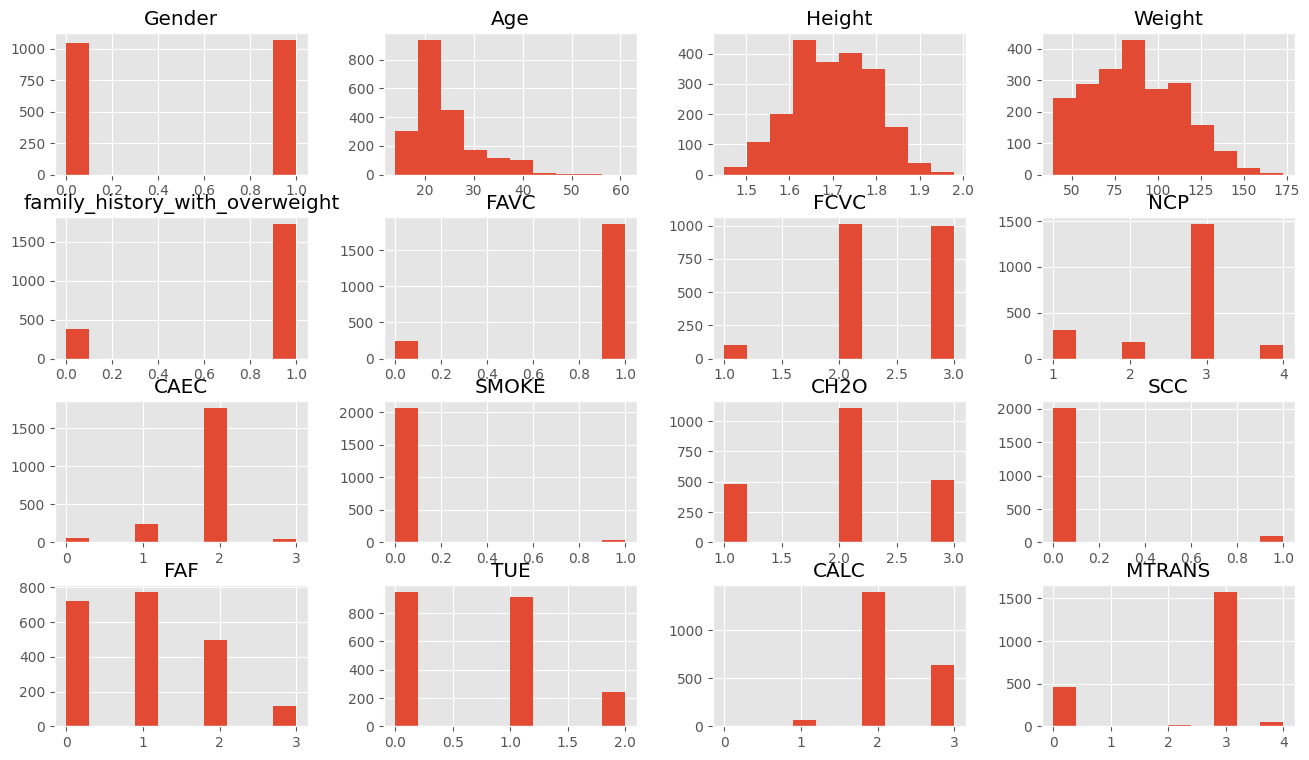

In [ ]:
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

dataframe.drop(["NObeyesdad"],axis=1).hist()
plt.show()

<Axes: title={'center': 'Correlación de características.'}>

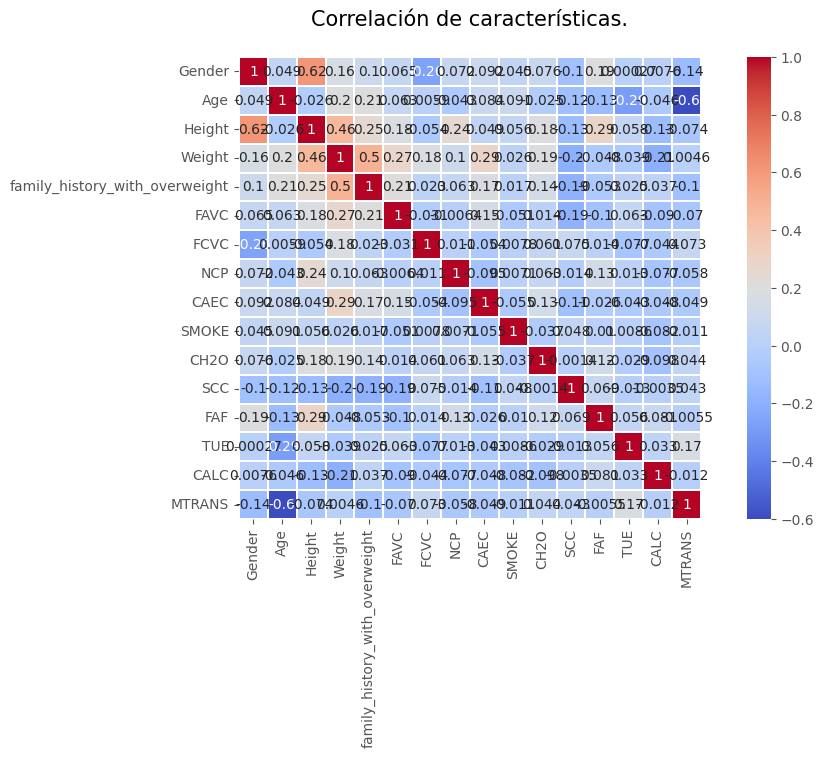

In [ ]:
colormap = plt.cm.coolwarm
plt.figure(figsize=(12,6))
plt.title('Correlación de características.', y=1.05, size=15)
sb.heatmap(dataframe.drop(['NObeyesdad'], axis=1).astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [ ]:
X=dataframe.drop(["CAEC", "CH2O", "SCC", "FAF", "TUE", "MTRANS", "NObeyesdad"],axis=1)
y=dataframe["NObeyesdad"]

print(X.shape)
print(y.shape)
print("Los valores de y son ",y)
print("Los nuevos valores de y son ",y)

(2111, 10)
(2111,)
Los valores de y son  0       1
1       1
2       1
3       5
4       6
       ..
2106    4
2107    4
2108    4
2109    4
2110    4
Name: NObeyesdad, Length: 2111, dtype: int64
Los nuevos valores de y son  0       1
1       1
2       1
3       5
4       6
       ..
2106    4
2107    4
2108    4
2109    4
2110    4
Name: NObeyesdad, Length: 2111, dtype: int64


In [ ]:
XTrain, XTest, yTrain, yTest=train_test_split(X,y,test_size=0.1,random_state=42)
print(yTrain)

613     0
1461    2
1798    3
678     0
819     5
       ..
1638    3
1095    6
1130    6
1294    2
860     5
Name: NObeyesdad, Length: 1899, dtype: int64


**Normalización de los datos**

In [ ]:
escalador = StandardScaler()
XTrain = escalador.fit_transform(XTrain)
XTest = escalador.transform(XTest)

**Implementación de MSV**

In [ ]:
modelo = SVC(C=10, kernel='rbf', gamma='scale')
modelo.fit(XTrain, yTrain)
yPredict  = modelo.predict(XTest)

In [ ]:
accuracy = metrics.accuracy_score(yTest, yPredict)
print("Accuracy =", accuracy)

Accuracy = 0.9339622641509434


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
precision_recall_fscore_support(yTest,yPredict, average=None)
target_names = ['Insufficient_Weight','Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II','Obesity_Type_III','Overweight_Level_I','Overweight_Level_II']
print(classification_report(yTest,yPredict, target_names=target_names))


                     precision    recall  f1-score   support

Insufficient_Weight       0.97      1.00      0.98        31
      Normal_Weight       0.88      0.86      0.87        35
     Obesity_Type_I       0.97      0.97      0.97        38
    Obesity_Type_II       0.97      1.00      0.99        35
   Obesity_Type_III       1.00      1.00      1.00        30
 Overweight_Level_I       0.74      0.77      0.76        22
Overweight_Level_II       0.95      0.86      0.90        21

           accuracy                           0.93       212
          macro avg       0.93      0.92      0.92       212
       weighted avg       0.93      0.93      0.93       212



In [ ]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report, accuracy_score

precision, recall, f1, support = precision_recall_fscore_support(yTest, yPredict, average='micro')
accuracy = accuracy_score(yTest, yPredict)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Support:", support)

target_names = dataframe["NObeyesdad"].unique()
print(classification_report(yTest, yPredict, labels=target_names))

Accuracy: 0.9339622641509434
Precision: 0.9339622641509434
Recall: 0.9339622641509434
F1-score: 0.9339622641509434
Support: None
              precision    recall  f1-score   support

           1       0.88      0.86      0.87        35
           5       0.74      0.77      0.76        22
           6       0.95      0.86      0.90        21
           2       0.97      0.97      0.97        38
           0       0.97      1.00      0.98        31
           3       0.97      1.00      0.99        35
           4       1.00      1.00      1.00        30

    accuracy                           0.93       212
   macro avg       0.93      0.92      0.92       212
weighted avg       0.93      0.93      0.93       212



**Matriz de confusión**

[[31  0  0  0  0  0  0]
 [ 1 30  1  0  0  3  0]
 [ 0  0 37  1  0  0  0]
 [ 0  0  0 35  0  0  0]
 [ 0  0  0  0 30  0  0]
 [ 0  4  0  0  0 17  1]
 [ 0  0  0  0  0  3 18]]


<Axes: >

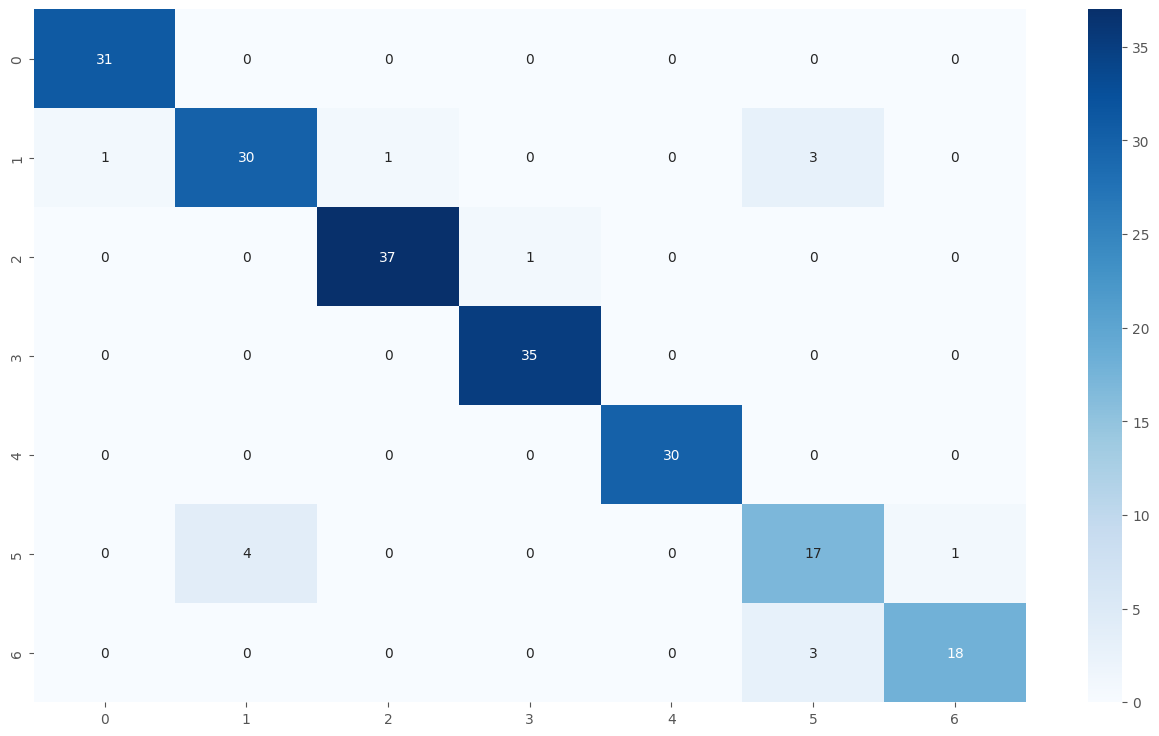

In [ ]:
matriz=confusion_matrix(yTest,yPredict)
print(matriz)
sb.heatmap(matriz,annot=True,cmap="Blues")

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
precision_recall_fscore_support(yTest,yPredict, average=None)
target_names = ['Insufficient_Weight','Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II','Obesity_Type_III','Overweight_Level_I','Overweight_Level_II']
print(classification_report(yTest,yPredict, target_names=target_names))

                     precision    recall  f1-score   support

Insufficient_Weight       0.97      1.00      0.98        31
      Normal_Weight       0.88      0.86      0.87        35
     Obesity_Type_I       0.97      0.97      0.97        38
    Obesity_Type_II       0.97      1.00      0.99        35
   Obesity_Type_III       1.00      1.00      1.00        30
 Overweight_Level_I       0.74      0.77      0.76        22
Overweight_Level_II       0.95      0.86      0.90        21

           accuracy                           0.93       212
          macro avg       0.93      0.92      0.92       212
       weighted avg       0.93      0.93      0.93       212

